In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [50]:
src = reload(src)

In [90]:
import pandas
import seaborn
import src
import os

In [123]:
def read_dataframe(kind):
    data = dict()
    for num_topics in [25, 50, 75, 100, 200, 300, 400, 500, 600]:
        projects = src.main.load_projects({"level": "method", "num_topics": num_topics})
        subdata = dict()
        for project in projects:
            ranks = src.main.read_ranks(project, kind)
            with open(os.path.join(project.full_path, 'ids.txt')) as f:
                ids = [x.strip() for x in f.readlines()]
            frms = [x for x,y,z in src.main.get_frms(ranks) if y in ids]
            mrr = src.utils.calculate_mrr(frms)
            subdata[project.printable_name + " "  + project.version] = mrr
        data[num_topics] = subdata
    return pandas.DataFrame(data)

In [124]:
lda = read_dataframe("release_lda")
vec = read_dataframe("release_vec")
vec_sums = read_dataframe("release_vec_sums")

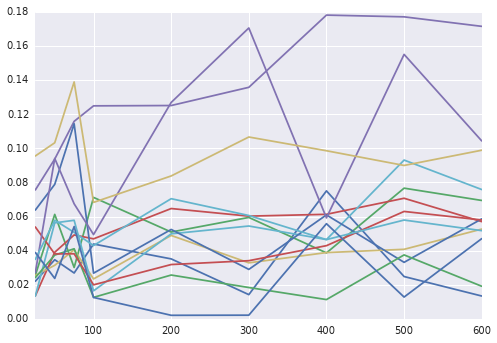

In [125]:
lda.T.plot(legend=False)

In [126]:
lda

,25,50,75,100,200,300,400,500,600
ArgoUML v0.22,0.022026,0.034646,0.026865,0.043860,0.035133,0.014168,0.075022,0.024786,0.013361
ArgoUML v0.24,0.025480,0.061232,0.030093,0.071195,0.050886,0.059456,0.038643,0.076617,0.069414
ArgoUML v0.26.2,0.013459,0.039014,0.049180,0.046896,0.064666,0.060215,0.061285,0.070694,0.057002
BookKeeper v4.3.0,0.075558,0.093679,0.115811,0.124895,0.125084,0.135764,0.178123,0.177104,0.171526
Derby v10.11.1.1,0.025435,0.031381,0.040464,0.023385,0.048883,0.032820,0.038844,0.040750,0.052614
JabRef v2.6,0.013314,0.056272,0.057772,0.016394,0.049834,0.054416,0.046470,0.093094,0.075813
Mahout v0.10.0,0.063778,0.078850,0.114379,0.026765,0.052407,0.028974,0.060946,0.033123,0.058600
OpenJPA v2.3.0,0.024148,0.037385,0.041065,0.012572,0.025668,0.018347,0.011276,0.037475,0.019087
Pig v0.14.0,0.053844,0.038050,0.038136,0.019922,0.031825,0.034082,0.042896,0.062963,0.057940
Tika v1.8,0.027096,0.094052,0.067439,0.049411,0.126896,0.170574,0.059172,0.155074,0.104334


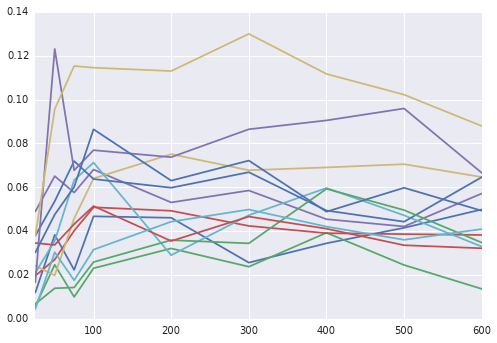

In [127]:
vec.T.plot(legend=False)

In [128]:
vec

,25,50,75,100,200,300,400,500,600
ArgoUML v0.22,0.011961,0.038290,0.022319,0.046743,0.046079,0.025626,0.034438,0.041514,0.049873
ArgoUML v0.24,0.005717,0.024664,0.009962,0.023068,0.032096,0.023761,0.039249,0.024535,0.013657
ArgoUML v0.26.2,0.019603,0.027047,0.040175,0.050869,0.049265,0.042376,0.039049,0.038626,0.038242
BookKeeper v4.3.0,0.048952,0.065090,0.057591,0.068065,0.053083,0.058525,0.045433,0.042116,0.057148
Derby v10.11.1.1,0.024179,0.019803,0.045752,0.064017,0.075095,0.067775,0.069055,0.070532,0.064671
JabRef v2.6,0.020987,0.035549,0.063253,0.071248,0.029003,0.047259,0.059649,0.047187,0.032954
Mahout v0.10.0,0.037933,0.053644,0.071931,0.063743,0.059797,0.066866,0.049382,0.044298,0.064598
OpenJPA v2.3.0,0.006788,0.013926,0.014284,0.025875,0.035881,0.034418,0.059295,0.049583,0.034767
Pig v0.14.0,0.034558,0.033705,0.043189,0.051424,0.035480,0.046628,0.041099,0.033560,0.032179
Tika v1.8,0.016617,0.123092,0.067747,0.076918,0.073726,0.086460,0.090503,0.095944,0.066587


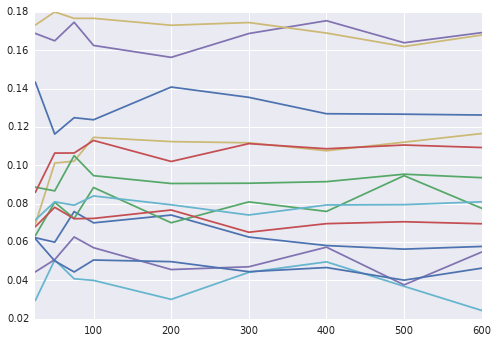

In [129]:
vec_sums.T.plot(legend=False)

In [130]:
vec_sums

,25,50,75,100,200,300,400,500,600
ArgoUML v0.22,0.062270,0.059943,0.075904,0.070025,0.074087,0.062610,0.058189,0.056322,0.057720
ArgoUML v0.24,0.063313,0.080760,0.072281,0.088447,0.070070,0.080960,0.075977,0.094617,0.077605
ArgoUML v0.26.2,0.068028,0.078135,0.072187,0.072332,0.076723,0.065133,0.069604,0.070597,0.069551
BookKeeper v4.3.0,0.168778,0.164930,0.174613,0.162514,0.156301,0.168728,0.175404,0.163919,0.169189
Derby v10.11.1.1,0.069422,0.101195,0.102182,0.114588,0.112382,0.111765,0.107611,0.112093,0.116576
JabRef v2.6,0.029537,0.050694,0.040861,0.040022,0.030126,0.044236,0.049687,0.036935,0.024346
Mahout v0.10.0,0.143404,0.116294,0.124845,0.123764,0.140825,0.135458,0.126907,0.126668,0.126236
OpenJPA v2.3.0,0.088625,0.086692,0.105067,0.094621,0.090538,0.090678,0.091503,0.095392,0.093569
Pig v0.14.0,0.085929,0.106400,0.106433,0.112975,0.102020,0.111323,0.108656,0.110597,0.109293
Tika v1.8,0.044465,0.050850,0.062655,0.057072,0.045680,0.047126,0.057350,0.037689,0.054812


In [131]:
df = pandas.DataFrame({"lda": lda.mean(), "vec": vec.mean(), "vec_sums": vec_sums.mean()})
df

,lda,vec,vec_sums
25,0.039493,0.023059,0.086937
50,0.057639,0.046799,0.092849
75,0.063454,0.048401,0.095175
100,0.043004,0.059578,0.095977
200,0.059043,0.054604,0.092386
300,0.059857,0.057823,0.093165
400,0.062574,0.056136,0.093533
500,0.071714,0.052764,0.091266
600,0.067483,0.048680,0.091862


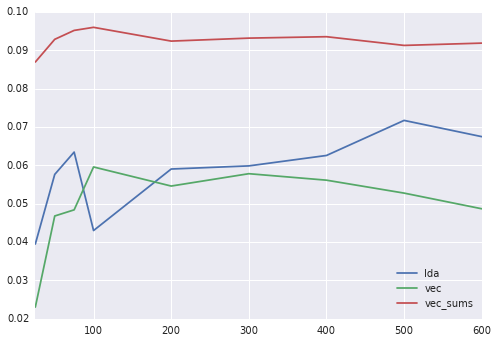

In [132]:
df.plot()

In [133]:
dits = ["ArgoUML v0.22", "ArgoUML v0.24", "ArgoUML v0.26.2", "JabRef v2.6", "jEdit v4.3", "muCommander v0.8.5"]

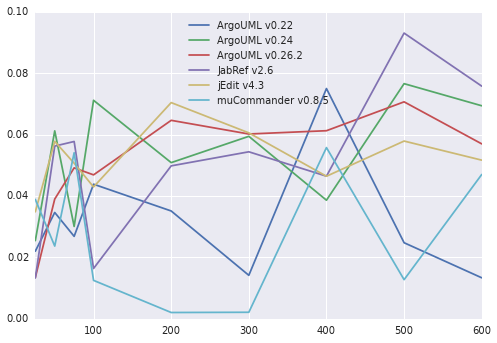

In [134]:
lda.ix[dits].T.plot()

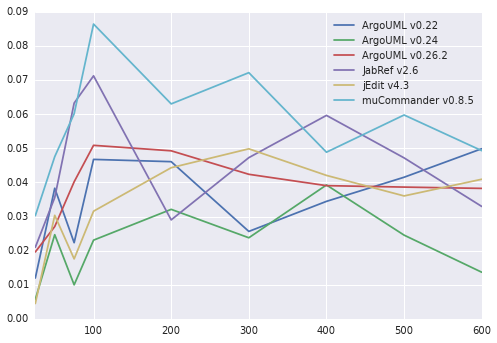

In [135]:
vec.ix[dits].T.plot()

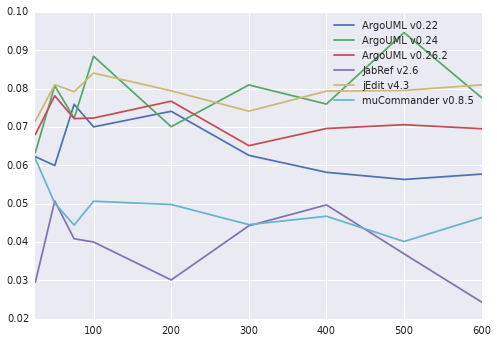

In [136]:
vec_sums.ix[dits].T.plot()

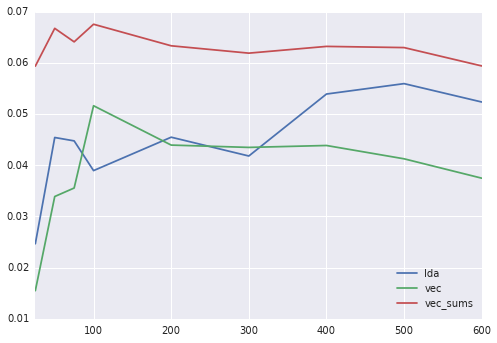

In [137]:
df = pandas.DataFrame({"lda": lda.ix[dits].mean(), "vec": vec.ix[dits].mean(), "vec_sums": vec_sums.ix[dits].mean()})
df.plot()